To be able to run this code you need to create a Kaggle account and then perform the following steps:

1. Go to Settings and scroll down to the API section
2. Click on "Create new API token" which will automatically download a file to your computer called kaggle.json
3. Make sure the json file is in the correct directory. If you are on a mac you can execute the following commands in the terminal to create the directory and move the file there.

    3a. mkdir -p ~/.kaggle
    
    3b. mv ~/Downloads/kaggle.json ~/.kaggle/
4. To ensure the file is secure and read-only you can set the following permissions:
    4a. chmod 600 ~/.kaggle/kaggle.json
5. Install the Kaggle library: pip install kaggle

In [33]:
import os

# Set the dataset URL
dataset_url = 'lesumitkumarroy/obesity-data-set'

# Create a directory to store the dataset
os.makedirs('obesity_dataset', exist_ok=True)

# Use the Kaggle API to download the dataset
!kaggle datasets download -d {dataset_url} -p obesity_dataset --unzip

# Load the data into a pandas DataFrame
import pandas as pd

# Assuming the dataset contains a CSV file named 'obesity.csv'
data = pd.read_csv('obesity_dataset/ObesityDataSet_raw_and_data_sinthetic.csv')

# Display the first few rows of the dataset
print(data.head())

Dataset URL: https://www.kaggle.com/datasets/lesumitkumarroy/obesity-data-set
License(s): unknown
100%|███████████████████████████████████████| 57.6k/57.6k [00:00<00:00, 270kB/s]
100%|███████████████████████████████████████| 57.6k/57.6k [00:00<00:00, 269kB/s]
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2

# Check for missing values

In [34]:
print(data.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [35]:
data.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [36]:
data_with_family_history = data[data.family_history_with_overweight == "yes"]

Let´s plot all of these columns against the target column NObeyesdad

Text(0.5, 1.0, 'Health Status data for people with a family history of being overweight')

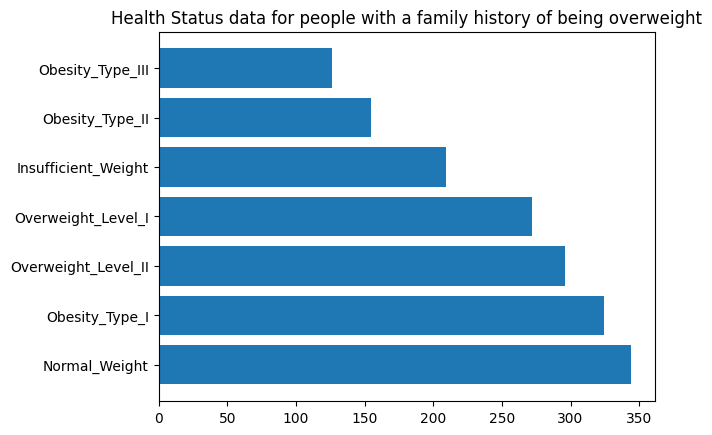

In [37]:
import matplotlib.pyplot as plt 

plt.barh(data_with_family_history.NObeyesdad.unique(), data_with_family_history.NObeyesdad.value_counts())
plt.title("Health Status data for people with a family history of being overweight")

In [38]:
data_with_no_family_history = data[data.family_history_with_overweight == "no"]

Text(0.5, 1.0, 'Health Status data for people with no family history of being overweight')

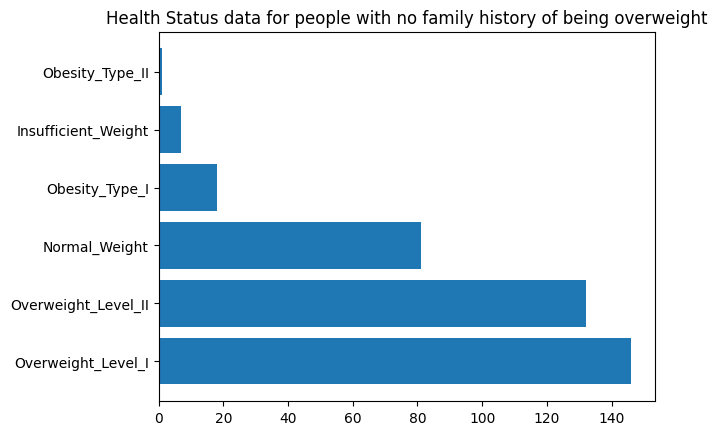

In [39]:
plt.barh(data_with_no_family_history.NObeyesdad.unique(), data_with_no_family_history.NObeyesdad.value_counts())
plt.title("Health Status data for people with no family history of being overweight")

How many people have a family history of being overweight vs not?

In [40]:
data.family_history_with_overweight.value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

Seems like there are significantly more people with a family history of being overweight. The dataset might be unbalanced - I also don´t know how they calculated that binary family history variable - how far back it expands or if it´s only immediate family e.g. Ok nevermind - I just checked, it´s from a public online survey. Let´s just roll with it. 

I found an explanation for the variables in this dataset here: https://www.kaggle.com/code/ashoksutharvjit/classification-on-obesity-dataset-by-ashok

Age : Feature, Continuous, "Age"

Height: Feature, Continuous

Weight: Feature Continuous

family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "

NCP : Feature, Continuous, " How many main meals do you have daily? "

CAEC : Feature, Categorical, " Do you eat any food between meals? "

SMOKE : Feature, Binary, " Do you smoke? "

CH2O: Feature, Continuous, " How much water do you drink daily? "

SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

FAF: Feature, Continuous, " How often do you have physical activity? "

TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "

MTRANS : Feature, Categorical, " Which transportation do you usually use? "

NObeyesdad : Target, Categorical, "Obesity level"

So we want to be able to use this information to figure out if a person is overweight, obese etc. or not. We have a mix of different variables here. Many of the variables including our target variable is categorical. We are interested in seeing how many of these variables we can use to predict the NObeyesdad variable. We could use all of them but let´s try to do some feature selection here - we might find some variables that actually confuse more than they help our predictive model. 

We can also look at the weight variable which is conveniently continous. Let´s plot the weight variable individually against the other continuous variables in the dataset. 

Text(0, 0.5, 'Height')

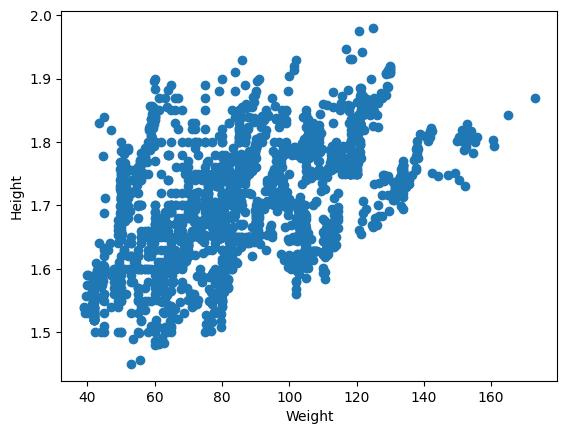

In [41]:
plt.scatter(data.Weight, data.Height)
plt.xlabel(data.Weight.name)
plt.ylabel(data.Height.name)


Text(0, 0.5, 'Age')

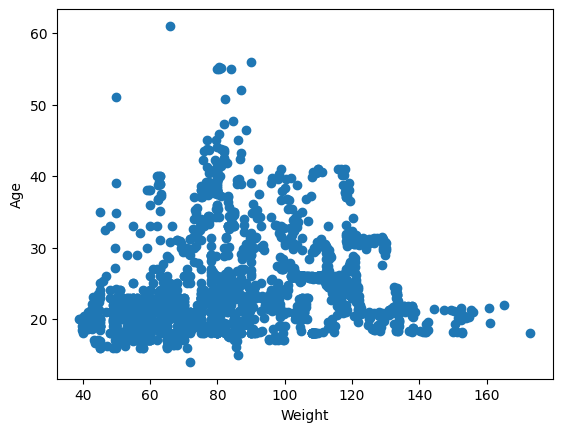

In [42]:
plt.scatter(data.Weight, data.Age)
plt.xlabel(data.Weight.name)
plt.ylabel(data.Age.name)

Text(0, 0.5, 'NCP')

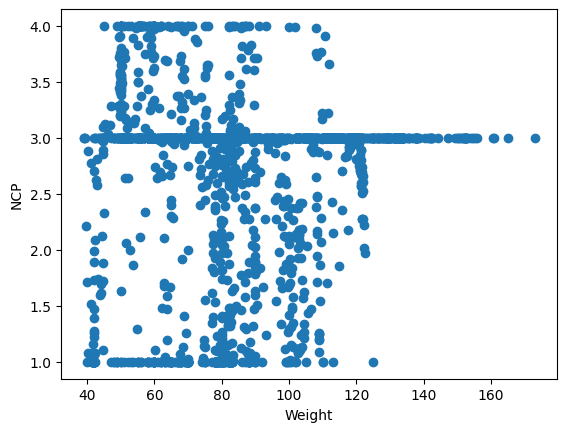

In [43]:
plt.scatter(data.Weight, data.NCP)
plt.xlabel(data.Weight.name)
plt.ylabel(data.NCP.name)

Text(0, 0.5, 'CH2O')

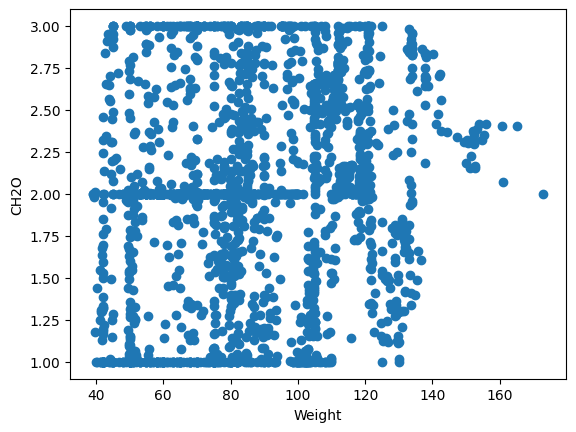

In [44]:
plt.scatter(data.Weight, data.CH2O)
plt.xlabel(data.Weight.name)
plt.ylabel(data.CH2O.name)

Text(0, 0.5, 'FAF')

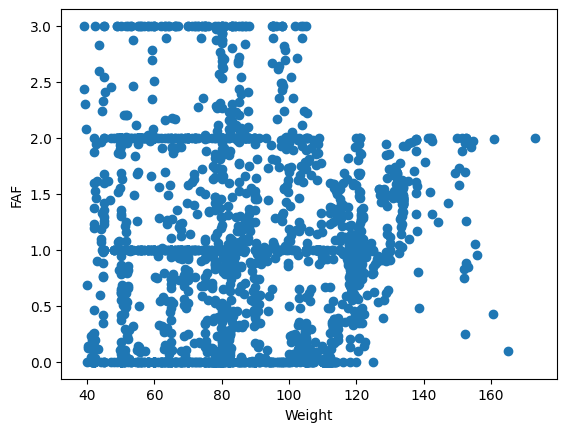

In [45]:
plt.scatter(data.Weight, data.FAF)
plt.xlabel(data.Weight.name)
plt.ylabel(data.FAF.name)

Ok let´s try to do some predicting with XGBoost because why not. And I have 12 minutes left in the library before I have to go home. 

NVM it´s giving me problems right now so let´s do the XGBoosting next time 

In [46]:
from xgboost import XGBClassifier

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = data.drop('NObeyesdad', axis=1)

X.CAEC = X.CAEC.astype("category")
X.CALC = X.CALC.astype("category")
X.MTRANS = X.MTRANS.astype("category")
X.Gender = X.Gender.astype("category")
X.family_history_with_overweight = X.family_history_with_overweight.astype("category")
X.FAVC = X.FAVC.astype("category")
X.SMOKE = X.SMOKE.astype("category")
X.SCC = X.SCC.astype("category")

y = data.NObeyesdad
label_encoder = LabelEncoder()
y_numerically_encoded = label_encoder.fit_transform(y)
train_X, test_X, train_y, test_y = train_test_split(X, y_numerically_encoded, test_size=0.25)

To make sure these categorical variables work with XGBoost we assign them as the category dtype and we enable categorical

In [82]:
xgboost_model = XGBClassifier(enable_categorical=True, tree_method='hist')
xgboost_model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [92]:
predictions_test = xgboost_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
print("Mean Absolute Error testing : " + str(mean_absolute_error(predictions_test, test_y)))
accuracy = accuracy_score(test_y, predictions_test) * 100  # Multiply by 100 to get percentage
print(f"Model Accuracy testing: {accuracy:.2f}%")

Mean Absolute Error testing : 0.07765151515151515
Model Accuracy testing: 96.78%


In [93]:
predictions_train = xgboost_model.predict(train_X)

print("Mean Absolute Error training : " + str(mean_absolute_error(predictions_train, train_y)))
accuracy = accuracy_score(train_y, predictions_train) * 100  # Multiply by 100 to get percentage
print(f"Model Accuracy training: {accuracy:.2f}%")

Mean Absolute Error training : 0.0
Model Accuracy training: 100.00%


In [95]:
from sklearn.metrics import classification_report

# Generate detailed classification metrics
print(classification_report(test_y, predictions_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        65
           1       0.96      0.93      0.95        74
           2       0.97      0.97      0.97        93
           3       0.97      1.00      0.99        69
           4       1.00      1.00      1.00        89
           5       0.97      0.93      0.95        67
           6       0.94      0.96      0.95        71

    accuracy                           0.97       528
   macro avg       0.97      0.97      0.97       528
weighted avg       0.97      0.97      0.97       528



The model is doing perfectly on the training data but it´s also doing really well (I would say) on the test set so I would say we´re not overfitting. Really nice precision and recall scores as well - I think I´m happy with this. 

Nice, let´s say we´re all happy with that and want to save this model and deploy it.

In [96]:
import pickle

# Assuming xgboost_model is your trained model
with open('predict_obesity_app/model.pkl', 'wb') as file:
    pickle.dump(xgboost_model, file)

In [102]:
import xgboost
print("let´s save the correct xgboost version in our requirements.txt")
print(xgboost.__version__)

let´s save the correct xgboost version in our requirements.txt
2.1.1
